# 232594T - Deep Learning Project

- This notebook is coded by Satini Sai Keerthan(232594T) from T4. In this notebook, I have successfully coded out a CNN architecture and have coded out 3 transfer learning architectures which we will discuss later on. The following topics will be discussed throughout this Notebook:

        1. Image Pre-Processing. 
        2. CNN Architecture
        3. The Various Transfer Learning Architectures.



## Image Pre-processing

Since the images from the dataset are blurry, I tried to improve the quality of the images through a ESRGAN from Tensorflow. This is so that the model performance will be better as the model will be able to better pick up certain features that diffrentiate between the three classes [Airplane, Automobile and Truck]

Code is tweaked from the official Tensorflow ESRGAN Documentation:

[Official Tensorflow ESRGAN Documentation](https://www.tensorflow.org/hub/tutorials/image_enhancing)

In [64]:
# Import libraries, using tensorflow hub to get the ESRGAN to unblur the images 
import os 
import time 
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow_hub as hub


The code below is the official code used to enhance the image quality of the original dataset, although the image is still blurry, it is a significant improvement from the original images. 

In [ ]:
import os
import tensorflow as tf
import tensorflow_hub as hub
from PIL import Image

# URL to the ESRGAN model on TensorFlow Hub
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"

# Load the ESRGAN model
print("Loading ESRGAN model...")
model = hub.load(SAVED_MODEL_PATH)
print("Model loaded successfully.")

def preprocess_image(image_path):

    image_data = tf.io.read_file(image_path) # this line reads the image file as a binary data 
    hr_image = tf.image.decode_image(image_data, channels=3) 
    

    original_shape = tf.shape(hr_image)[:2]
    new_shape = (original_shape // 4) * 4 # Adjust the shape so that both dimensions are multiples of 4 (to match ESRGAN requirements)
    hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, new_shape[0], new_shape[1])

    hr_image = tf.cast(hr_image, tf.float32)
    return tf.expand_dims(hr_image, 0)


# this function converts tensorflow image to a standard image format and saves it

def save_image(image_tensor, filename):

    image_tensor = tf.clip_by_value(image_tensor, 0, 255)
    

    if image_tensor.shape[0] == 1:
        image_tensor = tf.squeeze(image_tensor, axis=0)
    else:
        image_tensor = tf.squeeze(image_tensor)  
    
  
    image_array = tf.cast(image_tensor, tf.uint8).numpy()
    pil_img = Image.fromarray(image_array)
    pil_img.save(f"{filename}.jpg")

def process_images(input_base_dir, output_base_dir):
    for split in ['train', 'test']: # function will process both train and test subfolders
        split_input_dir = os.path.join(input_base_dir, split)
        split_output_dir = os.path.join(output_base_dir, split)
        
      
        if not os.path.isdir(split_input_dir):
            print(f"Folder not found: {split_input_dir}")
            continue
        

        for class_name in os.listdir(split_input_dir):
            class_input_dir = os.path.join(split_input_dir, class_name)
            if not os.path.isdir(class_input_dir):
                continue
            
            class_output_dir = os.path.join(split_output_dir, class_name) # creates output directory for each class. 
            os.makedirs(class_output_dir, exist_ok=True)
            
            for img_file in os.listdir(class_input_dir):
                img_path = os.path.join(class_input_dir, img_file)
                if not os.path.isfile(img_path):
                    continue
                
                try:
    
                    hr_image = preprocess_image(img_path)
                    sr_image = model(hr_image) # applies the GAN
                    sr_image = tf.squeeze(sr_image)  # removes the batch dimensio. 
                    
              
                    base_name = os.path.splitext(img_file)[0]
                    output_path = os.path.join(class_output_dir, base_name)
                    
                 
                    save_image(sr_image, output_path)
                    print(f"Processed: {img_path} -> {output_path}.jpg")
                except Exception as e:
                    print(f"Error processing {img_path}: {str(e)}")

# run the script 
if __name__ == "__main__":
  
    INPUT_DIR = "/Users/saikeerthan/NYP-AI/Deep_Learning/Project2/dataset"
   
    OUTPUT_DIR = "/Users/saikeerthan/NYP-AI/Deep_Learning/Project2/enhanced_images"
    
    process_images(INPUT_DIR, OUTPUT_DIR)
    print("All images processed!")

Loading ESRGAN model...
Model loaded successfully.
Processed: /Users/saikeerthan/NYP-AI/Deep_Learning/Project2/dataset/train/truck/1804.png -> /Users/saikeerthan/NYP-AI/Deep_Learning/Project2/enhanced_images/train/truck/1804.jpg
Processed: /Users/saikeerthan/NYP-AI/Deep_Learning/Project2/dataset/train/truck/1810.png -> /Users/saikeerthan/NYP-AI/Deep_Learning/Project2/enhanced_images/train/truck/1810.jpg
Processed: /Users/saikeerthan/NYP-AI/Deep_Learning/Project2/dataset/train/truck/0298.png -> /Users/saikeerthan/NYP-AI/Deep_Learning/Project2/enhanced_images/train/truck/0298.jpg
Processed: /Users/saikeerthan/NYP-AI/Deep_Learning/Project2/dataset/train/truck/1186.png -> /Users/saikeerthan/NYP-AI/Deep_Learning/Project2/enhanced_images/train/truck/1186.jpg
Processed: /Users/saikeerthan/NYP-AI/Deep_Learning/Project2/dataset/train/truck/1838.png -> /Users/saikeerthan/NYP-AI/Deep_Learning/Project2/enhanced_images/train/truck/1838.jpg
Processed: /Users/saikeerthan/NYP-AI/Deep_Learning/Project2

Text(0.5, 1.0, 'After ESRGAN')

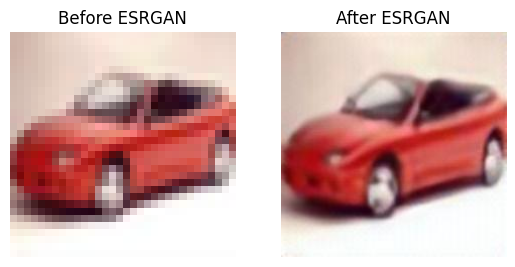

In [67]:
# view the image side by side 

original = cv2.imread('/Users/saikeerthan/NYP-AI/Deep_Learning/Project3/dataset_transport/test/automobile/0481.png')
enhanced = cv2.imread('/Users/saikeerthan/NYP-AI/Deep_Learning/Project3/enhanced_images/test/automobile/0481.png')


# Convert the images from BGR to RGB format so Matplotlib can display them correctly
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
enhanced = cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB)



plt.subplot(1, 2, 1) 
plt.imshow(original)  
plt.axis('off')  
plt.title("Before ESRGAN") 

plt.subplot(1, 2, 2) 
plt.imshow(enhanced)  
plt.axis('off')  
plt.title("After ESRGAN") 

Above is the results of the ESRGAN. Multiple attempts through the same function, but the image quality was unable to be improved. 

Sending the first improved batch again through the same GAN did not work and was taking up computation resources and longer time than the first iteration, this can be because of:
1.	Diminishing returns – Running the model again does not add meaningful improvements and can introduce artifacts.
2.	Increased processing time – Enhanced images have higher resolution, making computations significantly slower.
3.	Possible artifacts – A second pass may create unrealistic textures, distortions, or noise instead of improving quality.
4.	ESRGAN is not designed for progressive enhancement – Unlike progressive GANs, ESRGAN does not refine images in multiple steps.

Data Augmentation was also not done explicity because: 
- Preserving the restored details – Traditional augmentations (rotation, flipping, cropping) might distort or degrade the fine details restored by ESRGAN.
- Augmentation may introduce inconsistencies – The ESRGAN-enhanced images might not align well with augmented versions (e.g., a flipped version might introduce unnatural textures).

## CNN- Model Training

Below is the code for CNN model training 

### CNN

In [35]:
import tensorflow as tf
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

train_path = "/Users/saikeerthan/NYP-AI/Deep_Learning/Project2/enhanced_images3/train"
test_path  = "/Users/saikeerthan/NYP-AI/Deep_Learning/Project2/enhanced_images3/test"

batch_size = 32
image_height = 224
image_width = 224
seed = 42

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    validation_split = 0.2,
    subset = "training",
    seed = 42,
    image_size=(224,224),
    batch_size =batch_size,
    label_mode = "categorical"
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    train_path,
    validation_split = 0.2,
    subset = "validation",
    seed = seed,
    image_size = (image_height, image_width),
    batch_size = batch_size,
    label_mode = "categorical"
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_path,
    seed = seed,
    image_size = (image_height, image_width),
    batch_size = batch_size,
    label_mode = "categorical"
)


Found 6000 files belonging to 3 classes.
Using 4800 files for training.
Found 6000 files belonging to 3 classes.
Using 1200 files for validation.
Found 1500 files belonging to 3 classes.


Created a Validation set as seen above as we want the model to generalise better on unseen data and prevent the model from just memorising the training data. 

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

# Autotune used for faster processing as the next set of images are loaded into memory. 

In [6]:
temp_test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_path,
    seed = seed,
    image_size = (image_height, image_width),
    batch_size = batch_size,
    label_mode = "categorical"
)


Found 1500 files belonging to 3 classes.


The Following CNN Architecture comprises of the following:

1.	Input Layer: Accepts images of shape (224, 224, 3), suitable for processing RGB images.
2.	Three Conv2D layers with Swish activation, each followed by Batch Normalization and MaxPooling to extract hierarchical spatial features.
3.	Flattening: Converts the feature maps into a 1D vector for classification.
4.	Fully Connected Layers:
5.	Three Dense layers (512, 256, 128 neurons) with L2 regularization to prevent overfitting.
6.	Dropout (50% and 40%) is applied for regularization.
7.	Output Layer: A Softmax layer with 3 neurons, indicating a 3-class classification problem.
8.	Optimization & Compilation:
9.	Uses the Adam optimizer with a learning rate of 0.0005.
10.	Loss function: Categorical Crossentropy, suitable for multi-class classification.
11. Metric: Categorical Accuracy to evaluate performance.
12. Swish Activation Function used instead of default "ReLu" function as it maintains small negative values, unlike ReLu that discards of negative values. This leads to smoother gradients and better performance deep networks. 


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation, Input
)
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam


input_tensor = Input(shape=(224, 224, 3)) 


x = Conv2D(32, (3, 3), activation='swish', padding='same')(input_tensor)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3), activation='swish', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, (3, 3), activation='swish', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x) 


x = Dense(512, activation='swish', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='swish', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(128, activation='swish', kernel_regularizer=l2(0.001))(x)
x = BatchNormalization()(x)


preds = Dense(3, activation='softmax')(x)


CNN_model_232494T = Model(inputs=input_tensor, outputs=preds)


CNN_model_232494T.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)


CNN_model_232494T.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,643,075 (197.00 MB)

 Trainable params: 51,640,835 (196.99 MB)

 Non-trainable params: 2,240 (8.75 KB)

**Optimiser**:
The model is optimized using the Adam optimizer, a variant of stochastic gradient descent (SGD) that adapts learning rates dynamically based on past gradient information.
A learning rate of 0.0001 is chosen to balance convergence speed and stability, ensuring smooth weight updates without drastic oscillations.

**Model Checkpoints**:
The ModelCheckpoint callback monitors validation accuracy (val_categorical_accuracy).
1. Only the best-performing model (highest validation accuracy) is saved to avoid storing unnecessary intermediate weights.
2. The filename is dynamically structured to include the epoch number and corresponding validation accuracy, facilitating model version tracking.

**Early Stopping**:
This mechanism halts training if validation loss does not improve for a specified number of epochs (patience = 5).
1.	min_delta = 0 ensures that even minor improvements are considered.
2.	restore_best_weights = False means that the final model retains the weights from the last epoch, rather than rolling back to the best-performing epoch.
3.	start_from_epoch = 0 activates early stopping from the beginning, ensuring training efficiency.

**Model Compilation**:
Loss function: categorical_crossentropy is employed as the dataset consists of multiple classes (i.e., softmax-based classification).
1. Metric: categorical_accuracy measures the proportion of correctly classified instances, ensuring meaningful performance evaluation.

**Callbacks:**
The model is trained on train_dataset and validated on val_dataset for up to 20 epochs.
1. If validation loss stagnates for 5 epochs, training automatically halts due to early stopping.
2. The best model is saved dynamically via ModelCheckpoint.



In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

epochs = 20
optimizer = Adam(learning_rate = 0.0001)


check_point = ModelCheckpoint(filepath='/Users/saikeerthan/NYP-AI/Deep_Learning/Project2/CNN_ModelFiles/flora-{epoch:02d}-{val_categorical_accuracy:.2f}.h5',monitor="val_categorical_accuracy", mode="max", save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    mode='auto',
    restore_best_weights=False,
    start_from_epoch=0
)


CNN_model_232494T.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])
history = CNN_model_232494T.fit(train_dataset, validation_data=val_dataset, epochs=epochs, callbacks=[early_stopping, check_point])

Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.5564 - loss: 2.5549

150/150 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - categorical_accuracy: 0.5567 - loss: 2.5544 - val_categorical_accuracy: 0.6392 - val_loss: 2.3316
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.6905 - loss: 2.2930

150/150 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - categorical_accuracy: 0.6906 - loss: 2.2929 - val_categorical_accuracy: 0.6842 - val_loss: 2.2366
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.7337 - loss: 2.1844

150/150 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - categorical_accuracy: 0.7338 - loss: 2.1842 - val_categorical_accuracy: 0.7033 - val_loss: 2.2138
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.7728 - loss: 2.0565

150/150 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - categorical_accuracy: 0.7729 - loss: 2.0563 - val_categorical_accuracy: 0.7083 - val_loss: 2.1606
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.8223 - loss: 1.9420

150/150 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - categorical_accuracy: 0.8223 - loss: 1.9419 - val_categorical_accuracy: 0.7433 - val_loss: 2.0768
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.8610 - loss: 1.8218

150/150 ━━━━━━━━━━━━━━━━━━━━ 253s 2s/step - categorical_accuracy: 0.8610 - loss: 1.8218 - val_categorical_accuracy: 0.7767 - val_loss: 1.9999
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - categorical_accuracy: 0.8951 - loss: 1.7291 - val_categorical_accuracy: 0.7600 - val_loss: 2.0130
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - categorical_accuracy: 0.9174 - loss: 1.6485 - val_categorical_accuracy: 0.7675 - val_loss: 1.9602
Epoch 9/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - categorical_accuracy: 0.9204 - loss: 1.5888 - val_categorical_accuracy: 0.7708 - val_loss: 1.9532
Epoch 10/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - categorical_accuracy: 0.9362 - loss: 1.5238 - val_categorical_accuracy: 0.7692 - val_loss: 1.9638
Epoch 11/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - categorical_accuracy: 0.9514 - loss: 1.4611 - val_categorical_accuracy: 0.7683 - val_loss: 1.9222
Epoch 12/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - categorical_accuracy: 0.9590 - loss

150/150 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - categorical_accuracy: 0.9590 - loss: 1.3382 - val_categorical_accuracy: 0.7783 - val_loss: 1.8398
Epoch 15/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.9671 - loss: 1.2832

150/150 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - categorical_accuracy: 0.9671 - loss: 1.2832 - val_categorical_accuracy: 0.7875 - val_loss: 1.7394
Epoch 16/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 211s 1s/step - categorical_accuracy: 0.9728 - loss: 1.2412 - val_categorical_accuracy: 0.7692 - val_loss: 1.8096
Epoch 17/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - categorical_accuracy: 0.9682 - loss: 1.2164 - val_categorical_accuracy: 0.7717 - val_loss: 1.7652
Epoch 18/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - categorical_accuracy: 0.9719 - loss: 1.1785 - val_categorical_accuracy: 0.7667 - val_loss: 1.7999
Epoch 19/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.9637 - loss: 1.1681

150/150 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - categorical_accuracy: 0.9637 - loss: 1.1680 - val_categorical_accuracy: 0.7958 - val_loss: 1.6492
Epoch 20/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 197s 1s/step - categorical_accuracy: 0.9700 - loss: 1.1168 - val_categorical_accuracy: 0.7667 - val_loss: 1.7579


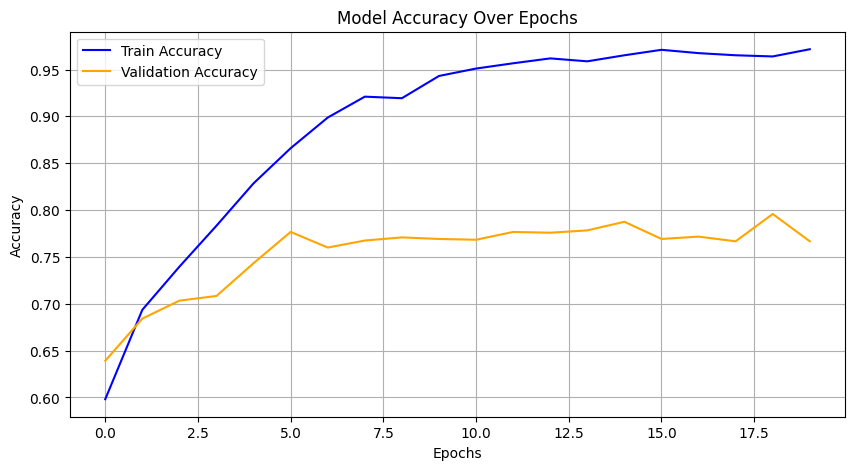

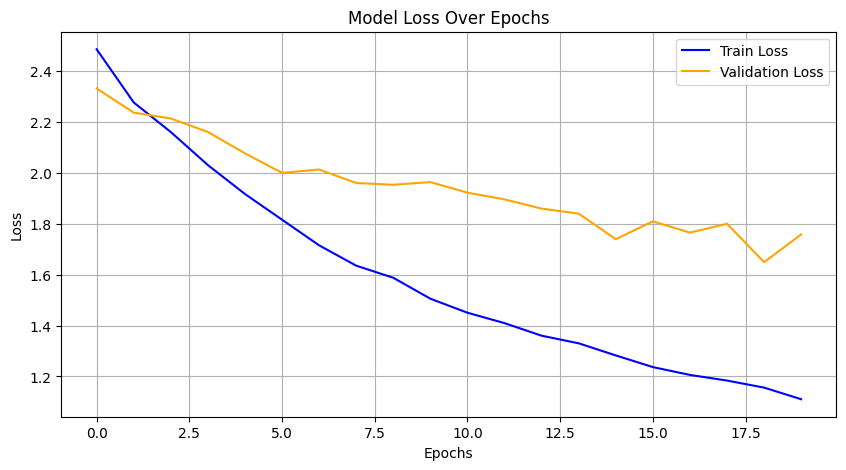

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history["categorical_accuracy"], label="Train Accuracy", color='blue')
plt.plot(history.history["val_categorical_accuracy"], label="Validation Accuracy", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Train Loss", color='blue')
plt.plot(history.history["val_loss"], label="Validation Loss", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss Over Epochs")
plt.grid(True)
plt.show()

**We can see from the accuracy graph that:**
1. The model is learning well but struggles to generalize to the validation set, as the training accuracy keeps improving while validation accuracy plateaus.
2. Overfitting is likely occurring because the model memorizes the training data but does not generalize well to new, unseen data.

**From the Loss Graph:**
1. The training loss keeps decreasing, meaning the model continues to optimize on training data.
2.	However, validation loss stops improving early, suggesting that the model stops learning useful patterns for unseen data.
3.	The fluctuations in validation loss indicate instability, possibly due to overfitting or data inconsistency.

In [20]:
# test acc and test loss 
test_loss_final, test_acc_final= CNN_model_232494T.evaluate(test_dataset)
print(f"Final Test loss: {test_loss_final:.3f}")
print(f"Final Test accuracy: {test_acc_final:.3f}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 239ms/step - categorical_accuracy: 0.7905 - loss: 1.7184
Final Test loss: 1.721
Final Test accuracy: 0.780


Initial Test Accuracy shows that the CNN model's accuracy is around 78%, which is sub-optimal, which we will now improve in the following code cells:

In [71]:
# Reload dataset without prefetching to access class_names
temp_dataset = tf.keras.utils.image_dataset_from_directory(
    test_path,
    batch_size=32,
    image_size=(224, 224),
    label_mode="categorical"
)

# Get class names from temp dataset
label_names = temp_dataset.class_names

# Print class names
print("Class Names:", label_names)

Found 1500 files belonging to 3 classes.
Class Names: ['airplane', 'automobile', 'truck']


In [27]:
cr = classification_report(y_true=y_gt, y_pred=y_predictions, target_names=label_names, digits=4)
print(cr)

              precision    recall  f1-score   support

    airplane     0.9309    0.7540    0.8331       500
  automobile     0.7807    0.7620    0.7713       500
       truck     0.6787    0.8240    0.7444       500

    accuracy                         0.7800      1500
   macro avg     0.7968    0.7800    0.7829      1500
weighted avg     0.7968    0.7800    0.7829      1500



**1. Precision:**
1.	Airplane (93.09%) has the highest precision, meaning that when the model predicts “airplane,” it is correct 93% of the time.
2.	Truck (67.87%) has the lowest precision, meaning many incorrect truck predictions were made.

**2. Recall:**
1. Truck (82.40%) has the highest recall, meaning most actual trucks were correctly classified.
2.	Airplane (75.40%) has the lowest recall, meaning many airplanes were misclassified as other classes.

**3. F1-score:**
1.	Airplane (83.31%) has the highest F1-score, showing a good tradeoff between precision and recall.
2.	Truck (74.44%) has a moderate F1-score but struggles with precision.


***Overall Model Performance***:

**1. Accuracy (78%)**
1.	The model correctly classified 78% of the 1500 test samples.

**2. Macro Average**
1.	The average precision (79.68%), recall (78.00%), and F1-score (78.29%) across all classes.
2.	Macro average treats all classes equally, meaning it highlights poor performance in underrepresented classes.

**3. Weighted Average**
1.	Similar to macro avg, but gives more weight to classes with more instances.
2.	Since all three classes have equal instances (500 each), macro avg and weighted avg are identical in this case.

In [29]:
CNN_model_232494T.save('/Users/saikeerthan/NYP-AI/Deep_Learning/Project2/CNN_ModelFiles/Full_Models/CNN_Draft1.keras')

### Fine Tuning CNN Model

loading the first draft of the model and refining the CNN architecture based so that it is optimised to train and identify blurry images.

In [42]:
for layer in model.layers:
    print(layer.name, layer.output.shape)

input_layer_2 (None, 224, 224, 3)
conv2d (None, 224, 224, 32)
batch_normalization_6 (None, 224, 224, 32)
max_pooling2d (None, 112, 112, 32)
conv2d_1 (None, 112, 112, 64)
batch_normalization_7 (None, 112, 112, 64)
max_pooling2d_1 (None, 56, 56, 64)
conv2d_2 (None, 56, 56, 128)
batch_normalization_8 (None, 56, 56, 128)
max_pooling2d_2 (None, 28, 28, 128)
flatten (None, 100352)
dense_9 (None, 512)
batch_normalization_9 (None, 512)
dropout_4 (None, 512)
dense_10 (None, 256)
batch_normalization_10 (None, 256)
dropout_5 (None, 256)
dense_11 (None, 128)
batch_normalization_11 (None, 128)
dense_12 (None, 3)


**Improvements over basic CNN Architecture**:

1. A new Intermediate layer was used to extract features from the convolutional layer. 
2. Multi scale feature extraction was implemented: 
   - Convolutional layers with different kernel sizes were implemented to help capture features at different scales. 
   - 3x3 kernels applied for fine grained details 
   - 5x5 kernels applied for mid-level patterns.
   - 7x7 kernels applied to capture global structure 
3. Batch Normalisation layer applied to stabolise learning 
4. The multi scale features are then concatenated to allow for richer representation, where an Average Pooling 2x2 pool size is implemeted to reduce spatial dimensions while still retaining important information. 
5. Dilation rate was introduced. The Dilution rate is 2, where it means that the convolution skips every second pixel, allowing for the receptive field to be increased without increasing the number of parameters. This helps to capture long range dependecides without losing resolution. 
6. A new squeeze and excitation attention mechanism was applied, which allows for the model to focus on important features, while suppressing the less informative ones. 
   - GAP computes a single feature per channel 
   - Two dense layers learns which channels are more important. 
   - Reweighting enhances key features. 
7. The classificiation head largely remains the same as compared to the previous architecture. 
8. Cosine Decay Learning Rate applied;
    - Gradually reduces the learning rate over time to improve fine tuning at later epochs. 
    - decays smoothly from the original learning rate. 

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, AveragePooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Concatenate, Flatten

# Load the saved model
model = load_model("/Users/saikeerthan/NYP-AI/Deep_Learning/Project2/CNN_ModelFiles/Full_Models/CNN_Draft1.keras")


intermediate_layer = model.get_layer("max_pooling2d_2").output 


branch1 = Conv2D(128, (3,3), activation='swish', padding="same")(intermediate_layer)
branch1 = BatchNormalization()(branch1)
branch2 = Conv2D(128, (5,5), activation='swish', padding="same")(intermediate_layer)
branch2 = BatchNormalization()(branch2)
branch3 = Conv2D(128, (7,7), activation='swish', padding="same")(intermediate_layer)
branch3 = BatchNormalization()(branch3)


x_multi = Concatenate()([branch1, branch2, branch3])
x_multi = AveragePooling2D(pool_size=(2,2))(x_multi)


x = Conv2D(256, (3,3), dilation_rate=2, activation='swish', padding="same")(x_multi)
x = BatchNormalization()(x)

# Add an attention mechanism to pick out the more important features. 
def attention_mechanism(input_tensor, reduction=16):
    channel_axis = -1  
    filters = input_tensor.shape[channel_axis]

    am = GlobalAveragePooling2D()(input_tensor)
    am = tf.keras.layers.Reshape((1, 1, filters))(am)

    am = Dense(filters // reduction, activation='swish', kernel_initializer='he_normal', use_bias=False)(am)
    am = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(am)

    return tf.keras.layers.Multiply()([input_tensor, am])

# Apply attention
x = attention_mechanism(x)

x = Flatten()(x)

x = Dense(512, activation='swish')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(256, activation='swish')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(128, activation='swish')(x)
x = BatchNormalization()(x)


output = Dense(3, activation='softmax')(x)

# Create new model
CNN_model_232494T = tf.keras.models.Model(inputs=model.input, outputs=output)

# Compile with categorical crossentropy and a cosine learning rate scheduler
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(initial_learning_rate=0.001, decay_steps=1000)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

CNN_model_232494T.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

CNN_model_232494T.summary()

/Users/saikeerthan/NYP-AI/Deep_Learning/Project2/project_dl/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 28 variables whereas the saved optimizer has 54 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 224, 224,  │        896 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 224, 224,  │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 112, 112,  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 112, 112,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 56, 56,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 56, 56,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 28, 28,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 28, 28,    │    147,584 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 28, 28,    │    409,728 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 28, 28,    │    802,944 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        512 │ conv2d_10[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        512 │ conv2d_11[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 28, 28,    │        512 │ conv2d_12[0][0]   │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 28, 28,    │          0 │ batch_normalizat

 Total params: 28,208,963 (107.61 MB)

 Trainable params: 28,205,443 (107.60 MB)

 Non-trainable params: 3,520 (13.75 KB)

In [ ]:
# Train with Early Stopping
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = CNN_model_232494T.fit(train_dataset, validation_data=validation_dataset, epochs=50, callbacks=[early_stop])

# Save the updated model
CNN_model_232494T.save("/Users/saikeerthan/NYP-AI/Deep_Learning/Project2/CNN_ModelFiles/Full_Models/CNN_Draft2.keras")

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 365s 2s/step - accuracy: 0.6313 - loss: 0.9078 - val_accuracy: 0.7475 - val_loss: 0.6926
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 446s 3s/step - accuracy: 0.8052 - loss: 0.4907 - val_accuracy: 0.8225 - val_loss: 0.4981
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.8829 - loss: 0.3202 - val_accuracy: 0.8608 - val_loss: 0.3745
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 343s 2s/step - accuracy: 0.9201 - loss: 0.2068 - val_accuracy: 0.8658 - val_loss: 0.3455
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 340s 2s/step - accuracy: 0.9562 - loss: 0.1237 - val_accuracy: 0.9133 - val_loss: 0.2462
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 366s 2s/step - accuracy: 0.9790 - loss: 0.0706 - val_accuracy: 0.9242 - val_loss: 0.2203
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 376s 3s/step - accuracy: 0.9894 - loss: 0.0463 - val_accuracy: 0.9258 - val_loss: 0.2151
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 384s 3s/step - accuracy: 0.9851 - loss: 0.0525 - val_accu

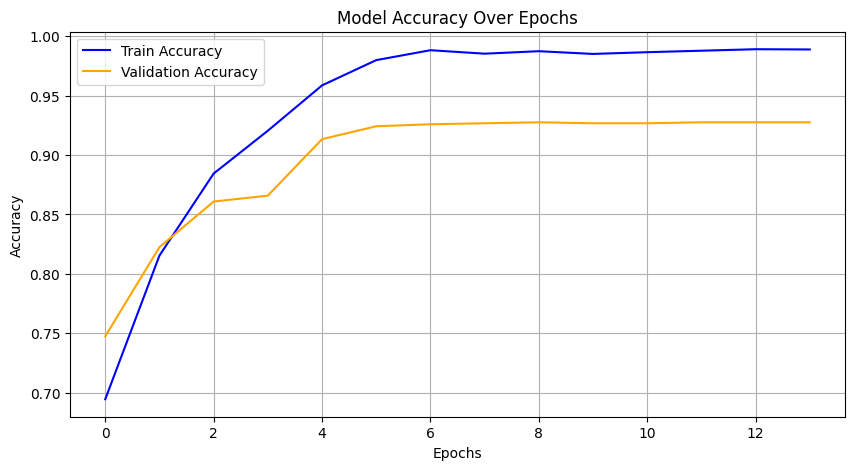

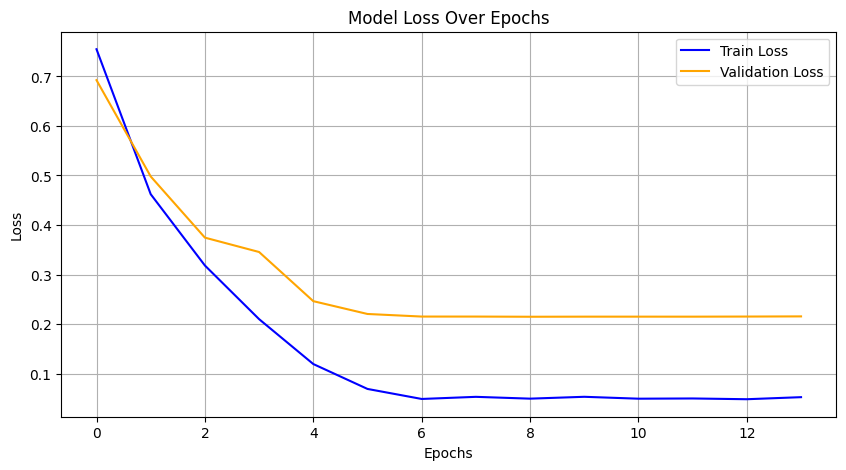

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history["accuracy"], label="Train Accuracy", color='blue')
plt.plot(history.history["val_accuracy"], label="Validation Accuracy", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Train Loss", color='blue')
plt.plot(history.history["val_loss"], label="Validation Loss", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss Over Epochs")
plt.grid(True)
plt.show()

If we were to compare these two graphs to the graphs of the first draft, here are some of the improvements we noticed: 

**Accuracy**:
1. The training accuracy almost reached 100%, which shows that the model has adapted and learned the training data effectively. 
2. The validation accuracy too sees a significant improvment and does not plateau too early and follows the training accuracy more closely than before. 

**Loss**:
1. The training loss is much lower than before. 
2. The validation loss also reaches a much lower value than before and remains somewhat stable and does not fluctuate a lot. 

In [ ]:
# test acc and test loss 
test_loss_final, test_acc_final= CNN_model_232494T.evaluate(test_dataset)
print(f"Final Test loss: {test_loss_final:.3f}")
print(f"Final Test accuracy: {test_acc_final:.3f}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 22s 467ms/step - accuracy: 0.9248 - loss: 0.2244
Final Test loss: 0.241
Final Test accuracy: 0.921


As we see above, the test accuracy has increased by a huge margin after applying various techniques to try and improve the model. 

**What caused the model to perform better?**:

1. Multi Scale Feature extraction, which allowed the model to capture diverse patterns. 
2. Expanded receptive fields allowed for the model to improve on feature learning. 
3. Attention Mechanism allowed for the model to focus on more important regions. 
4. Cosine Learning Rate Decay allowed for the model to converge more smoothly. 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


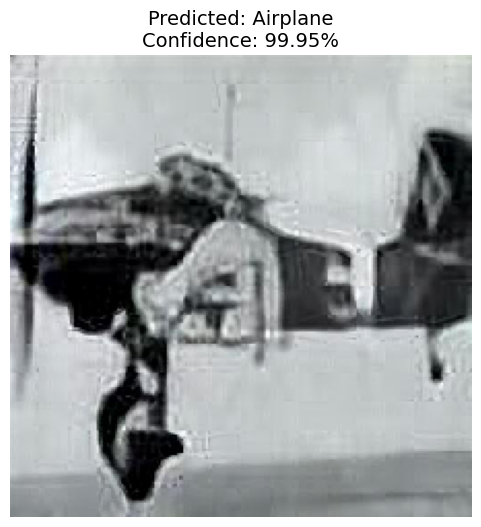

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

# Define class labels (modify based on your dataset)
class_labels = ["Airplane", "Truck", "Automobile"] 

def preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))  
    image_array = img_to_array(image) 
    image_normalized = image_array.astype(np.float32) / 255.0  
    image_expanded = np.expand_dims(image_normalized, axis=0) 

    return image, image_expanded 

def predict_image(image_path, model):

    original, preprocessed = preprocess_image(image_path)  

    preds = model.predict(preprocessed) 
    pred_class = np.argmax(preds, axis=1)[0] 
    confidence = np.max(preds) * 100 

  
    plt.figure(figsize=(6, 6))
    plt.imshow(original)  
    plt.axis("off")
    plt.title(f"Predicted: {class_labels[pred_class]}\nConfidence: {confidence:.2f}%", fontsize=14)
    plt.show()



CNN_Draft2 = tf.keras.models.load_model("/Users/saikeerthan/NYP-AI/Deep_Learning/Project2/CNN_ModelFiles/Full_Models/CNN_Draft2.keras")


image_path = "/Users/saikeerthan/NYP-AI/Deep_Learning/Project2/enhanced_images3/test/airplane/0014.jpg"


predict_image(image_path, CNN_Draft2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 666ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 509ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

2025-02-10 18:09:47.364427: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


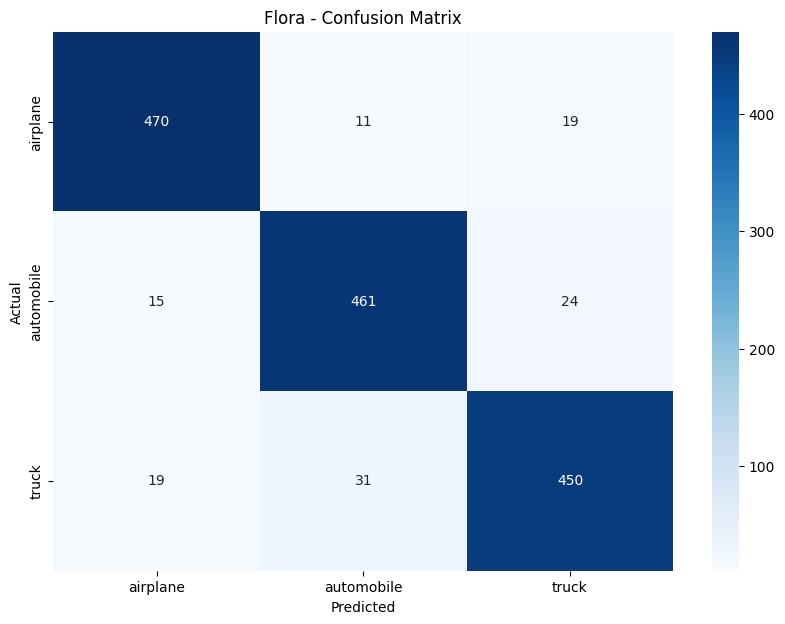

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

y_gt = []
y_predictions = []

for images, labels in test_dataset:
    predictions = CNN_Draft2.predict(images)
    y_gt.extend(np.argmax(labels.numpy(), axis=1))
    y_predictions.extend(np.argmax(predictions, axis=1))

matrix = confusion_matrix(y_true=y_gt, y_pred=y_predictions)

plt.figure(figsize=(10,7))
sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Flora - Confusion Matrix")
plt.show()

The above confusion matrix shows that the model is performing well, correctly classifying 90-94% of across all classes, although it messes up between automobile and trucks due to similar features and the blurry images. 

In [3]:
from tensorflow.keras.models import load_model
CNN_model_232494T = load_model("/Users/saikeerthan/NYP-AI/Deep_Learning/Project2/CNN_ModelFiles/Full_Models/CNN_Draft2.keras")

## Transfer Learning

For the Transfer Learning part of this ipynb, I have trained 3 different transfer learning models. The following paragraph are the different models I trained and the reasons as to why I chose to train each of the three models. My final analysis will be at the end of this section. 

1. MobileNetV3 Small:
   - Lightweight model works well on smaller datasets. 
   - Leverages depthwise separable convolutions, reducing parameters while maintaining accuracy. 
   - Uses hard-swish activation and lightweight attention mechanisms to focus on essential details. 
   - Fast inference. 
2. Inception:
   - Leverages dense connections, allowing every layer has gradient updates from the previous layer. 
   - Handles Blurry images well as the feature maps are re-used, capturing low-level details that might be lost in CNNs.
3. DenseNet
   - Leverages multiple kernel sizes per layer, allowing to capture both local and global features. 
   - As it learns at multiple receptive fields, it is optimal for images with varying resolution and blur. 



### MobileNetV3 Small:

In order for the transfer learning model to be able to effectively capture different parts of the image and learn from it, I applied the following changes: 

1. Concatenated both Global Average and Global Max Pools: 
    - GAP takes the overall mean value of the feature map.
    - GMP takes the strongest activation for each map. 
    - Combining both allows for the model to benefit from smooth feature aggregation from the GAP and strong activation preservation from GMP.

2. L2 applied to prevent overfitting by penalising large weights. 
3. Fine last 50 layers allows for the adaptation to new dataset and extracts strong feature representations. 
4. Swish Activation function used insteaf of default ReLu to capture as much essential information as possible by taking in negative values. 


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Small  
from tensorflow.keras.layers import (
    Dense, GlobalAveragePooling2D, GlobalMaxPooling2D,
    Dropout, BatchNormalization, Activation, Concatenate
)
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV3Small(weights='imagenet', include_top=False)


for layer in base_model.layers[:-50]:
    layer.trainable = False
for layer in base_model.layers[-50:]:
    layer.trainable = True


gap = GlobalAveragePooling2D()(base_model.output)
gmp = GlobalMaxPooling2D()(base_model.output)
combined_pool = Concatenate()([gap, gmp])
combined_pool = BatchNormalization()(combined_pool) 


x = Dense(512, kernel_regularizer=l2(0.001))(combined_pool)
x = Activation('swish')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, kernel_regularizer=l2(0.001))(x)
x = Activation('swish')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(128, kernel_regularizer=l2(0.001))(x)
x = Activation('swish')(x)
x = BatchNormalization()(x)
# x = Dropout(0.3)(x)


preds = Dense(3, activation='softmax')(x) 


Transfer_232594T = Model(inputs=base_model.input, outputs=preds) 

Transfer_232594T.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

Transfer_232594T.summary()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

epochs = 50
optimizer = Adam(learning_rate = 0.0001)


check_point = ModelCheckpoint(filepath='/Users/saikeerthan/NYP-AI/Deep_Learning/Project2/TF_modelfiles/model_files/TF-{epoch:02d}-{val_categorical_accuracy:.2f}.h5',monitor="val_categorical_accuracy", mode="max", save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    mode='auto',
    restore_best_weights=False,
    start_from_epoch=0
) # track best version of model by it's loss on the validation set. 


Transfer_232594T.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])
history = Transfer_232594T.fit(train_dataset, validation_data=val_dataset, epochs=epochs, callbacks=[early_stopping, check_point])

Epoch 1/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - categorical_accuracy: 0.6199 - loss: 2.0997

150/150 ━━━━━━━━━━━━━━━━━━━━ 27s 153ms/step - categorical_accuracy: 0.6207 - loss: 2.0980 - val_categorical_accuracy: 0.9333 - val_loss: 1.4099
Epoch 2/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - categorical_accuracy: 0.9000 - loss: 1.4724

150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 149ms/step - categorical_accuracy: 0.9001 - loss: 1.4723 - val_categorical_accuracy: 0.9417 - val_loss: 1.3541
Epoch 3/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - categorical_accuracy: 0.9359 - loss: 1.3735

150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 150ms/step - categorical_accuracy: 0.9359 - loss: 1.3734 - val_categorical_accuracy: 0.9492 - val_loss: 1.3215
Epoch 4/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - categorical_accuracy: 0.9514 - loss: 1.3143

150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 150ms/step - categorical_accuracy: 0.9514 - loss: 1.3144 - val_categorical_accuracy: 0.9600 - val_loss: 1.2865
Epoch 5/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - categorical_accuracy: 0.9577 - loss: 1.2822

150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 153ms/step - categorical_accuracy: 0.9577 - loss: 1.2822 - val_categorical_accuracy: 0.9675 - val_loss: 1.2507
Epoch 6/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 151ms/step - categorical_accuracy: 0.9752 - loss: 1.2323 - val_categorical_accuracy: 0.9675 - val_loss: 1.2277
Epoch 7/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - categorical_accuracy: 0.9730 - loss: 1.2084

150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 153ms/step - categorical_accuracy: 0.9730 - loss: 1.2084 - val_categorical_accuracy: 0.9700 - val_loss: 1.2085
Epoch 8/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - categorical_accuracy: 0.9769 - loss: 1.1802

150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 152ms/step - categorical_accuracy: 0.9769 - loss: 1.1802 - val_categorical_accuracy: 0.9775 - val_loss: 1.1788
Epoch 9/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 154ms/step - categorical_accuracy: 0.9892 - loss: 1.1342 - val_categorical_accuracy: 0.9750 - val_loss: 1.1594
Epoch 10/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 154ms/step - categorical_accuracy: 0.9911 - loss: 1.1092 - val_categorical_accuracy: 0.9717 - val_loss: 1.1356
Epoch 11/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 25s 164ms/step - categorical_accuracy: 0.9910 - loss: 1.0842 - val_categorical_accuracy: 0.9758 - val_loss: 1.1082
Epoch 12/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 171ms/step - categorical_accuracy: 0.9925 - loss: 1.0547 - val_categorical_accuracy: 0.9758 - val_loss: 1.0819
Epoch 13/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - categorical_accuracy: 0.9916 - loss: 1.0266

150/150 ━━━━━━━━━━━━━━━━━━━━ 27s 180ms/step - categorical_accuracy: 0.9916 - loss: 1.0266 - val_categorical_accuracy: 0.9783 - val_loss: 1.0514
Epoch 14/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - categorical_accuracy: 0.9930 - loss: 0.9994

150/150 ━━━━━━━━━━━━━━━━━━━━ 28s 185ms/step - categorical_accuracy: 0.9930 - loss: 0.9994 - val_categorical_accuracy: 0.9792 - val_loss: 1.0226
Epoch 15/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 27s 182ms/step - categorical_accuracy: 0.9913 - loss: 0.9763 - val_categorical_accuracy: 0.9775 - val_loss: 1.0081
Epoch 16/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 27s 179ms/step - categorical_accuracy: 0.9974 - loss: 0.9354 - val_categorical_accuracy: 0.9775 - val_loss: 0.9813
Epoch 17/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 28s 183ms/step - categorical_accuracy: 0.9935 - loss: 0.9216 - val_categorical_accuracy: 0.9733 - val_loss: 0.9475
Epoch 18/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 27s 183ms/step - categorical_accuracy: 0.9961 - loss: 0.8804 - val_categorical_accuracy: 0.9758 - val_loss: 0.9162
Epoch 19/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 28s 186ms/step - categorical_accuracy: 0.9942 - loss: 0.8557 - val_categorical_accuracy: 0.9775 - val_loss: 0.8830
Epoch 20/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 28s 186ms/step - categorical_accura

In [ ]:
Transfer_232594T.save("/Users/saikeerthan/NYP-AI/Deep_Learning/Project2/TF_modelfiles/model_files/Full_ModelsTransfer_Draft1.keras")

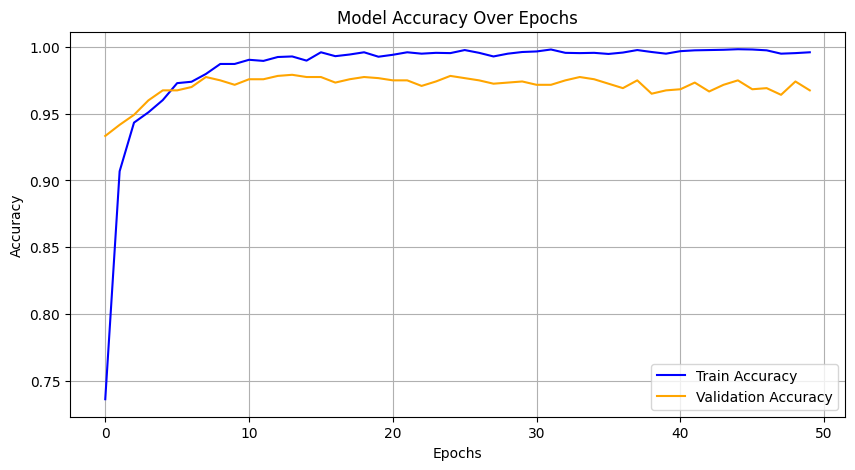

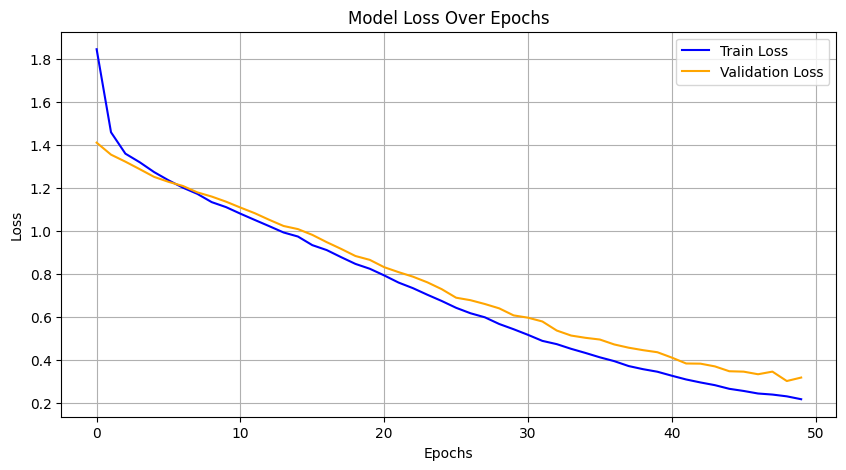

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history["categorical_accuracy"], label="Train Accuracy", color='blue')
plt.plot(history.history["val_categorical_accuracy"], label="Validation Accuracy", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Train Loss", color='blue')
plt.plot(history.history["val_loss"], label="Validation Loss", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss Over Epochs")
plt.grid(True)
plt.show()

In [ ]:
# test acc and test loss 
test_loss_final, test_acc_final= Transfer_232594T.evaluate(test_dataset)
print(f"Final Test loss: {test_loss_final:.3f}")
print(f"Final Test accuracy: {test_acc_final:.3f}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - categorical_accuracy: 0.9682 - loss: 0.3350
Final Test loss: 0.338
Final Test accuracy: 0.970


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━

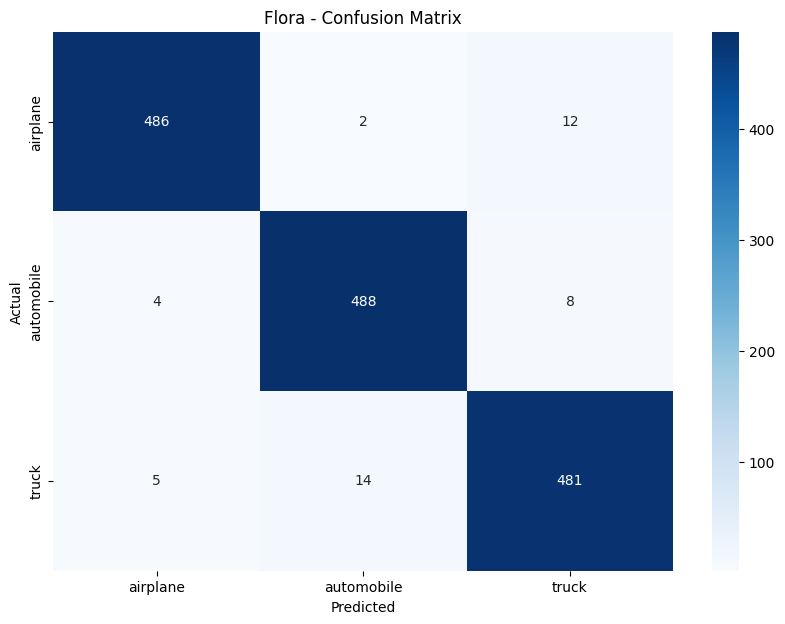

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

y_gt = []
y_predictions = []

for images, labels in test_dataset:
    predictions = Transfer_232594T.predict(images)
    y_gt.extend(np.argmax(labels.numpy(), axis=1))
    y_predictions.extend(np.argmax(predictions, axis=1))

matrix = confusion_matrix(y_true=y_gt, y_pred=y_predictions)

plt.figure(figsize=(10,7))
sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Flora - Confusion Matrix")
plt.show()

In [96]:
cr = classification_report(y_true=y_gt, y_pred=y_predictions, target_names=label_names, digits=4)
print(cr)

              precision    recall  f1-score   support

    airplane     0.9818    0.9720    0.9769       500
  automobile     0.9683    0.9760    0.9721       500
       truck     0.9601    0.9620    0.9610       500

    accuracy                         0.9700      1500
   macro avg     0.9701    0.9700    0.9700      1500
weighted avg     0.9701    0.9700    0.9700      1500



As compared to the CNN, there is significantly higher precision, recall and f1 score across all the classes with both airplane and automobile classes exceeding 97% accuracy. The truck classifications too improved to 96% allowing for better predictions of the class. 

#### Fine Tuning Transfer Learning Model (MobileNetV3 Small)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV3Small  
from tensorflow.keras.layers import (
    Dense, GlobalAveragePooling2D, GlobalMaxPooling2D,
    Dropout, BatchNormalization, Activation, Concatenate, Input, Multiply, Reshape
)

from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def attention_mechanism(input_tensor, reduction=16):
    channels = int(input_tensor.shape[-1])
    am = GlobalAveragePooling2D()(input_tensor)
    am = Reshape((1, 1, channels))(am)
    am = Dense(channels // reduction, activation='relu', kernel_initializer='he_normal', use_bias=False)(am)
    am = Dense(channels, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(am)
    x = Multiply()([input_tensor, am])
    return x

In [ ]:
base_model = MobileNetV3Small(weights='imagenet', include_top=False)


for layer in base_model.layers[:-50]:
    layer.trainable = False
for layer in base_model.layers[-50:]:
    layer.trainable = True


features = attention_mechanism(base_model.output, reduction=16)


gap = GlobalAveragePooling2D()(features)
gmp = GlobalMaxPooling2D()(features)
combined_pool = Concatenate()([gap, gmp])
combined_pool = BatchNormalization()(combined_pool)


x = Dense(512, kernel_regularizer=l2(0.001))(combined_pool)
x = Activation('swish')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, kernel_regularizer=l2(0.001))(x)
x = Activation('swish')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(128, kernel_regularizer=l2(0.001))(x)
x = Activation('swish')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)  

preds = Dense(3, activation='softmax')(x)  


Transfer_Draft2 = Model(inputs=base_model.inputs, outputs=preds)
Transfer_Draft2.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

Transfer_Draft2.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, None,      │          0 │ input_layer_1[0]… │
│ (Rescaling)         │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv (Conv2D)       │ (None, None,      │        432 │ rescaling_1[0][0] │
│                     │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_bn             │ (None, None,      │         64 │ conv[0][0]        │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_18       │ (None, None,      │          0 │ conv_bn[0][0]     │
│ (Activation)        │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │          0 │ activation_18[0]… │
│ (ZeroPadding2D)     │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │        144 │ expanded_conv_de… │
│ (DepthwiseConv2D)   │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, None,      │         64 │ expanded_conv_de… │
│ (BatchNormalizatio… │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_14 (ReLU)     │ (None, None,      │          0 │ expanded_conv_de… │
│                     │ None, 16)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 16)  │          0 │ re_lu_14[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 8)   │        136 │ expanded_conv_sq… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 8)   │          0 │ expanded_conv_sq… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 16)  │        144 │ expanded_conv_sq… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_9 (Add)         │ (None, 1, 1, 16)  │          0 │ expanded_conv_sq… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_15 (ReLU)     │ (None, 1, 1, 16)  │          0 │ add_9[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_10         │ (None, 1, 1, 16)  │          0 │ re_lu_15[0][0]    │
│ (Multiply)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, None,      │          0 │ re_lu_14[0][0],   │
│ (Multiply)          │ None, 16)         │            │ multiply_10[0][0] │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,743,731 (6.65 MB)

 Trainable params: 1,537,099 (5.86 MB)

 Non-trainable params: 206,632 (807.16 KB)

In [12]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

epochs = 100
optimizer = Adam(learning_rate = 0.0001)


check_point = ModelCheckpoint(filepath='/Users/saikeerthan/NYP-AI/Deep_Learning/Project2/TF_modelfiles/model_files/TF2-{epoch:02d}-{val_categorical_accuracy:.2f}.h5',monitor="val_categorical_accuracy", mode="max", save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    mode='auto',
    restore_best_weights=False,
    start_from_epoch=0
) # track best version of model by it's loss on the validation set. 


Transfer_Draft2.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])
history = Transfer_Draft2.fit(train_dataset, validation_data=validation_dataset, epochs=epochs, callbacks=[early_stopping, check_point])

Epoch 1/100


/Users/saikeerthan/NYP-AI/Deep_Learning/Project2/project_dl/lib/python3.10/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_184']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - categorical_accuracy: 0.5265 - loss: 2.4127

150/150 ━━━━━━━━━━━━━━━━━━━━ 26s 149ms/step - categorical_accuracy: 0.5273 - loss: 2.4105 - val_categorical_accuracy: 0.9125 - val_loss: 1.4905
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - categorical_accuracy: 0.8547 - loss: 1.5884

150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 151ms/step - categorical_accuracy: 0.8547 - loss: 1.5884 - val_categorical_accuracy: 0.9500 - val_loss: 1.3608
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - categorical_accuracy: 0.9101 - loss: 1.4572

150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 154ms/step - categorical_accuracy: 0.9101 - loss: 1.4572 - val_categorical_accuracy: 0.9517 - val_loss: 1.3393
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - categorical_accuracy: 0.9287 - loss: 1.3761

150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 156ms/step - categorical_accuracy: 0.9287 - loss: 1.3762 - val_categorical_accuracy: 0.9575 - val_loss: 1.3158
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - categorical_accuracy: 0.9506 - loss: 1.3278

150/150 ━━━━━━━━━━━━━━━━━━━━ 22s 149ms/step - categorical_accuracy: 0.9506 - loss: 1.3279 - val_categorical_accuracy: 0.9608 - val_loss: 1.2924
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - categorical_accuracy: 0.9629 - loss: 1.2912

150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 150ms/step - categorical_accuracy: 0.9629 - loss: 1.2913 - val_categorical_accuracy: 0.9675 - val_loss: 1.2708
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 151ms/step - categorical_accuracy: 0.9651 - loss: 1.2699 - val_categorical_accuracy: 0.9617 - val_loss: 1.2532
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 156ms/step - categorical_accuracy: 0.9759 - loss: 1.2284 - val_categorical_accuracy: 0.9667 - val_loss: 1.2317
Epoch 9/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - categorical_accuracy: 0.9710 - loss: 1.2197

150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 155ms/step - categorical_accuracy: 0.9710 - loss: 1.2197 - val_categorical_accuracy: 0.9700 - val_loss: 1.2137
Epoch 10/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 151ms/step - categorical_accuracy: 0.9712 - loss: 1.1980 - val_categorical_accuracy: 0.9700 - val_loss: 1.1952
Epoch 11/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 151ms/step - categorical_accuracy: 0.9859 - loss: 1.1547 - val_categorical_accuracy: 0.9650 - val_loss: 1.1849
Epoch 12/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - categorical_accuracy: 0.9876 - loss: 1.1371

150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 156ms/step - categorical_accuracy: 0.9876 - loss: 1.1371 - val_categorical_accuracy: 0.9708 - val_loss: 1.1628
Epoch 13/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - categorical_accuracy: 0.9882 - loss: 1.1189

150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 156ms/step - categorical_accuracy: 0.9882 - loss: 1.1188 - val_categorical_accuracy: 0.9725 - val_loss: 1.1463
Epoch 14/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 24s 160ms/step - categorical_accuracy: 0.9875 - loss: 1.0994 - val_categorical_accuracy: 0.9708 - val_loss: 1.1287
Epoch 15/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - categorical_accuracy: 0.9903 - loss: 1.0700

150/150 ━━━━━━━━━━━━━━━━━━━━ 25s 163ms/step - categorical_accuracy: 0.9903 - loss: 1.0700 - val_categorical_accuracy: 0.9767 - val_loss: 1.1030
Epoch 16/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 155ms/step - categorical_accuracy: 0.9909 - loss: 1.0485 - val_categorical_accuracy: 0.9733 - val_loss: 1.0831
Epoch 17/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 24s 159ms/step - categorical_accuracy: 0.9855 - loss: 1.0349 - val_categorical_accuracy: 0.9750 - val_loss: 1.0620
Epoch 18/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - categorical_accuracy: 0.9905 - loss: 1.0064

150/150 ━━━━━━━━━━━━━━━━━━━━ 24s 158ms/step - categorical_accuracy: 0.9906 - loss: 1.0064 - val_categorical_accuracy: 0.9792 - val_loss: 1.0356
Epoch 19/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - categorical_accuracy: 0.9955 - loss: 0.9740

150/150 ━━━━━━━━━━━━━━━━━━━━ 24s 158ms/step - categorical_accuracy: 0.9955 - loss: 0.9739 - val_categorical_accuracy: 0.9800 - val_loss: 1.0108
Epoch 20/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 153ms/step - categorical_accuracy: 0.9950 - loss: 0.9519 - val_categorical_accuracy: 0.9767 - val_loss: 0.9924
Epoch 21/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 153ms/step - categorical_accuracy: 0.9926 - loss: 0.9338 - val_categorical_accuracy: 0.9800 - val_loss: 0.9714
Epoch 22/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 154ms/step - categorical_accuracy: 0.9957 - loss: 0.9016 - val_categorical_accuracy: 0.9750 - val_loss: 0.9499
Epoch 23/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 156ms/step - categorical_accuracy: 0.9940 - loss: 0.8771 - val_categorical_accuracy: 0.9750 - val_loss: 0.9231
Epoch 24/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 23s 155ms/step - categorical_accuracy: 0.9945 - loss: 0.8536 - val_categorical_accuracy: 0.9742 - val_loss: 0.8931
Epoch 25/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 24s 158ms/step - categorical_

150/150 ━━━━━━━━━━━━━━━━━━━━ 25s 164ms/step - categorical_accuracy: 0.9973 - loss: 0.7707 - val_categorical_accuracy: 0.9808 - val_loss: 0.8077
Epoch 28/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 24s 161ms/step - categorical_accuracy: 0.9945 - loss: 0.7489 - val_categorical_accuracy: 0.9758 - val_loss: 0.8005
Epoch 29/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - categorical_accuracy: 0.9923 - loss: 0.7268

150/150 ━━━━━━━━━━━━━━━━━━━━ 24s 159ms/step - categorical_accuracy: 0.9924 - loss: 0.7268 - val_categorical_accuracy: 0.9825 - val_loss: 0.7663
Epoch 30/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 24s 158ms/step - categorical_accuracy: 0.9954 - loss: 0.6974 - val_categorical_accuracy: 0.9767 - val_loss: 0.7443
Epoch 31/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 24s 158ms/step - categorical_accuracy: 0.9953 - loss: 0.6698 - val_categorical_accuracy: 0.9733 - val_loss: 0.7259
Epoch 32/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 24s 163ms/step - categorical_accuracy: 0.9968 - loss: 0.6422 - val_categorical_accuracy: 0.9725 - val_loss: 0.6983
Epoch 33/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 25s 165ms/step - categorical_accuracy: 0.9966 - loss: 0.6249 - val_categorical_accuracy: 0.9775 - val_loss: 0.6687
Epoch 34/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 24s 163ms/step - categorical_accuracy: 0.9979 - loss: 0.5913 - val_categorical_accuracy: 0.9758 - val_loss: 0.6502
Epoch 35/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 24s 161ms/step - categorical_

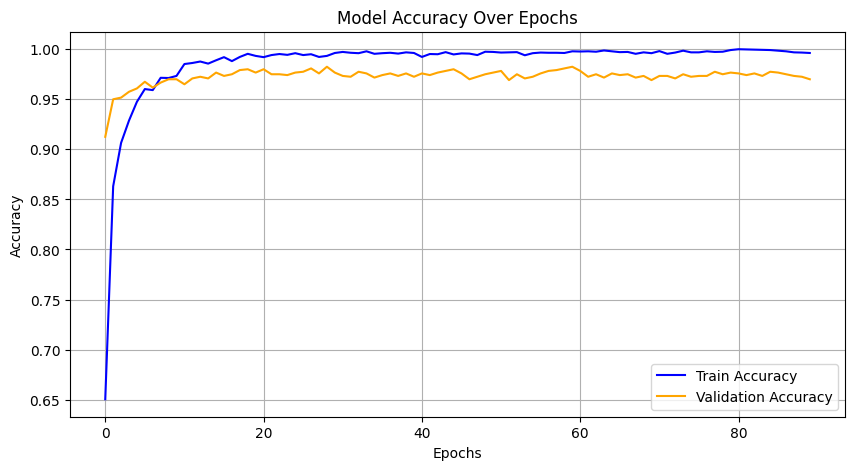

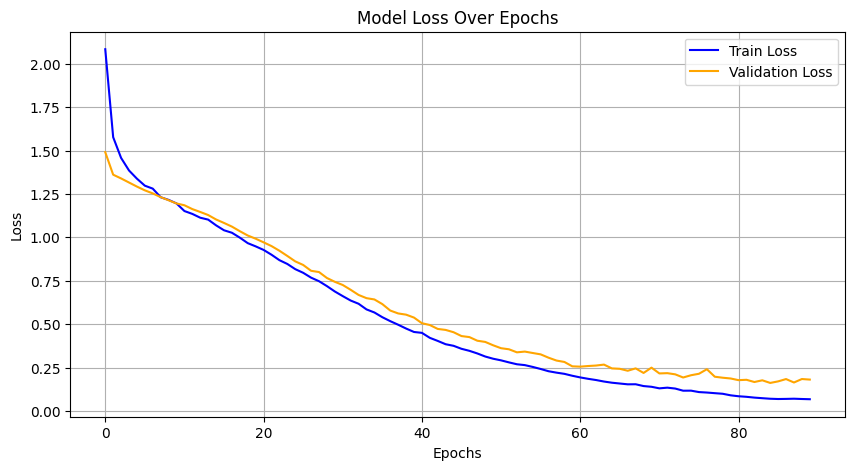

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(history.history["categorical_accuracy"], label="Train Accuracy", color='blue')
plt.plot(history.history["val_categorical_accuracy"], label="Validation Accuracy", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(history.history["loss"], label="Train Loss", color='blue')
plt.plot(history.history["val_loss"], label="Validation Loss", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss Over Epochs")
plt.grid(True)
plt.show()

In [14]:
# test acc and test loss 
test_loss_final, test_acc_final= Transfer_Draft2.evaluate(test_dataset)
print(f"Final Test loss: {test_loss_final:.3f}")
print(f"Final Test accuracy: {test_acc_final:.3f}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - categorical_accuracy: 0.9644 - loss: 0.1697
Final Test loss: 0.187
Final Test accuracy: 0.966


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━

2025-02-11 11:22:11.648840: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


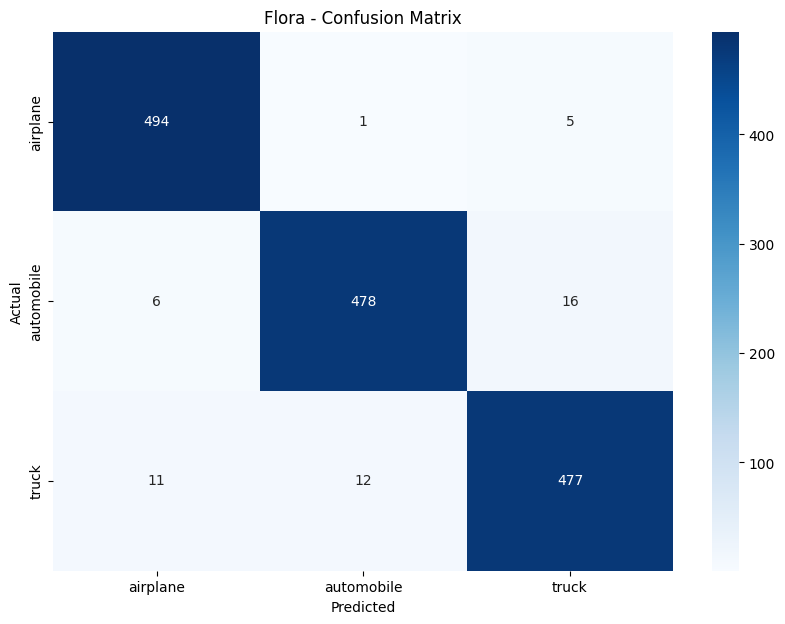

In [16]:
label_names = train_dataset.class_names
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

y_gt = []
y_predictions = []

for images, labels in test_dataset:
    predictions = Transfer_Draft2.predict(images)
    y_gt.extend(np.argmax(labels.numpy(), axis=1))
    y_predictions.extend(np.argmax(predictions, axis=1))

matrix = confusion_matrix(y_true=y_gt, y_pred=y_predictions)

plt.figure(figsize=(10,7))
sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Flora - Confusion Matrix")
plt.show()

In [17]:
cr = classification_report(y_true=y_gt, y_pred=y_predictions, target_names=label_names, digits=4)
print(cr)

              precision    recall  f1-score   support

    airplane     0.9667    0.9880    0.9773       500
  automobile     0.9735    0.9560    0.9647       500
       truck     0.9578    0.9540    0.9559       500

    accuracy                         0.9660      1500
   macro avg     0.9660    0.9660    0.9659      1500
weighted avg     0.9660    0.9660    0.9659      1500



The fine tuning of the MobileNet V3 Small Model resulted in poorer performance from the model, and these could be the reasons: 

1. Attention Mechanism might be overemphasizing some features
  - This might have caused some bias towards dominant features, leading to minor class imbalances. 
  - According to the confusion matrix, misclassificatins increased slightly 

2. Learning rate might have been too high 

As a result, for the official comparison of different transfer learning models, we will take the first draft of MobileNetV3 Small. 

### Inception Transfer Learning

Inception required different aspect ratio. It required the aspect ratio of 299,299 instead of the 224,224 we used in CNN & MobileNetV3 Small. This is why I am keeping a separate dataset for inception model training. 

We will be utilising InceptionV3 which is a convolutional neural network architecture that makes several improvements over previous models. These include using Label Smoothing, Factorized 7 x 7 convolutions, and the use of an auxiliary classifier to propagate label information lower down the network.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


inception_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of data for validation
)


inception_train_dataset = inception_train_datagen.flow_from_directory(
    '/Users/saikeerthan/NYP-AI/Deep_Learning/Project2/enhanced_images3/train',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)


inception_validation_dataset = inception_train_datagen.flow_from_directory(
    '/Users/saikeerthan/NYP-AI/Deep_Learning/Project2/enhanced_images3/train',
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 4800 images belonging to 3 classes.
Found 1200 images belonging to 3 classes.


In [ ]:

test_datagen = ImageDataGenerator(rescale=1./255)

inception_test_dataset = test_datagen.flow_from_directory(
    "/Users/saikeerthan/NYP-AI/Deep_Learning/Project2/enhanced_images3/test", 
    target_size=(299, 299),       
    batch_size=32,
    class_mode='categorical'
)

Found 1500 images belonging to 3 classes.


1. Like the previous models, we utilised the attention mechanism block 
2. Froze and unfroze some layers for Fine-Tuning.
   - Freezing the first 50 layers allows for the model to capture generic features like edges, textures and shapes. 
   - Unfreezing the last 10 layers allows the model to learn more specific features, which separates the three different classes. 
3. Concatenated GAP and GMP for better preservatin both global struture and dominant feature presence. 
4. Utilised Swish to retain negative values that might hold essential information. 

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import (
    Dense, GlobalAveragePooling2D, GlobalMaxPooling2D,
    Dropout, BatchNormalization, Activation, Concatenate, Input, Multiply, Reshape
)
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def attention_mechanism(input_tensor, reduction=16):

    channels = int(input_tensor.shape[-1])
    am = GlobalAveragePooling2D()(input_tensor)
    am = Reshape((1, 1, channels))(am)
    am = Dense(channels // reduction, activation='relu', kernel_initializer='he_normal', use_bias=False)(am)
    am = Dense(channels, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(am)
    x = Multiply()([input_tensor, am])
    return x


base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))


for layer in base_model.layers[:-50]:
    layer.trainable = False
for layer in base_model.layers[-50:]:
    layer.trainable = True


features = attention_mechanism(base_model.output, reduction=16)


gap = GlobalAveragePooling2D()(features)
gmp = GlobalMaxPooling2D()(features)
combined_pool = Concatenate()([gap, gmp])
combined_pool = BatchNormalization()(combined_pool)

x = Dense(512, kernel_regularizer=l2(0.001))(combined_pool)
x = Activation('swish')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, kernel_regularizer=l2(0.001))(x)
x = Activation('swish')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(128, kernel_regularizer=l2(0.001))(x)
x = Activation('swish')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x) 


preds = Dense(3, activation='softmax')(x)


Transfer_Inception_232594T = Model(inputs=base_model.inputs, outputs=preds)
Transfer_Inception_232594T.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

Transfer_Inception_232594T.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_282 (Conv2D) │ (None, 149, 149,  │        864 │ input_layer_3[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 149, 149,  │         96 │ conv2d_282[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_291      │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_283 (Conv2D) │ (None, 147, 147,  │      9,216 │ activation_291[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_283[0][0]  │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_292      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_284 (Conv2D) │ (None, 147, 147,  │     18,432 │ activation_292[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_284[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_293      │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_12    │ (None, 73, 73,    │          0 │ activation_293[0… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_285 (Conv2D) │ (None, 73, 73,    │      5,120 │ max_pooling2d_12… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_285[0][0]  │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_294      │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_286 (Conv2D) │ (None, 71, 71,    │    138,240 │ activation_294[0… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_286[0][0]  │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_295      │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 24,609,315 (93.88 MB)

 Trainable params: 9,969,859 (38.03 MB)

 Non-trainable params: 14,639,456 (55.85 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

epochs = 20
optimizer = Adam(learning_rate = 0.0001)


check_point = ModelCheckpoint(filepath='/Users/saikeerthan/NYP-AI/Deep_Learning/Project2/Inception_Files/Model_Checkpoints/Inception-{epoch:02d}-{val_categorical_accuracy:.2f}.h5',monitor="val_categorical_accuracy", mode="max", save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    mode='auto',
    restore_best_weights=False,
    start_from_epoch=0
) # track best version of model by it's loss on the validation set. 


Transfer_Inception_232594T.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])
inception_history = Transfer_Inception_232594T.fit(inception_train_dataset, validation_data=inception_validation_dataset, epochs=epochs, callbacks=[early_stopping, check_point])

Epoch 1/20


/Users/saikeerthan/NYP-AI/Deep_Learning/Project/new_dl/lib/python3.10/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1095']
Received: inputs=Tensor(shape=(None, 299, 299, 3))
  warnings.warn(msg)


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.6730 - loss: 2.2580

/Users/saikeerthan/NYP-AI/Deep_Learning/Project/new_dl/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


150/150 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - categorical_accuracy: 0.6738 - loss: 2.2560 - val_categorical_accuracy: 0.8958 - val_loss: 1.7144
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.8996 - loss: 1.6825

150/150 ━━━━━━━━━━━━━━━━━━━━ 340s 2s/step - categorical_accuracy: 0.8996 - loss: 1.6825 - val_categorical_accuracy: 0.9217 - val_loss: 1.6317
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.9229 - loss: 1.6201

150/150 ━━━━━━━━━━━━━━━━━━━━ 375s 3s/step - categorical_accuracy: 0.9229 - loss: 1.6201 - val_categorical_accuracy: 0.9433 - val_loss: 1.5438
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - categorical_accuracy: 0.9360 - loss: 1.5621

150/150 ━━━━━━━━━━━━━━━━━━━━ 469s 3s/step - categorical_accuracy: 0.9360 - loss: 1.5622 - val_categorical_accuracy: 0.9500 - val_loss: 1.5116
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - categorical_accuracy: 0.9478 - loss: 1.5226

150/150 ━━━━━━━━━━━━━━━━━━━━ 486s 3s/step - categorical_accuracy: 0.9478 - loss: 1.5227 - val_categorical_accuracy: 0.9617 - val_loss: 1.4704
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 419s 3s/step - categorical_accuracy: 0.9395 - loss: 1.5267 - val_categorical_accuracy: 0.9517 - val_loss: 1.4834
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 397s 3s/step - categorical_accuracy: 0.9457 - loss: 1.4859 - val_categorical_accuracy: 0.9533 - val_loss: 1.4409
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step - categorical_accuracy: 0.9537 - loss: 1.4528 - val_categorical_accuracy: 0.9583 - val_loss: 1.4134
Epoch 9/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.9555 - loss: 1.4225

150/150 ━━━━━━━━━━━━━━━━━━━━ 365s 2s/step - categorical_accuracy: 0.9555 - loss: 1.4224 - val_categorical_accuracy: 0.9675 - val_loss: 1.3632
Epoch 10/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 364s 2s/step - categorical_accuracy: 0.9558 - loss: 1.3806 - val_categorical_accuracy: 0.9667 - val_loss: 1.3465
Epoch 11/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 371s 2s/step - categorical_accuracy: 0.9689 - loss: 1.3235 - val_categorical_accuracy: 0.9575 - val_loss: 1.3511
Epoch 12/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 368s 2s/step - categorical_accuracy: 0.9678 - loss: 1.2949 - val_categorical_accuracy: 0.9608 - val_loss: 1.3292
Epoch 13/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 342s 2s/step - categorical_accuracy: 0.9632 - loss: 1.2696 - val_categorical_accuracy: 0.9583 - val_loss: 1.2706
Epoch 14/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 362s 2s/step - categorical_accuracy: 0.9677 - loss: 1.2386 - val_categorical_accuracy: 0.9583 - val_loss: 1.2512
Epoch 15/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 340s 2s/step - categorical_accuracy: 0.9777 - l

150/150 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - categorical_accuracy: 0.9774 - loss: 1.1347 - val_categorical_accuracy: 0.9683 - val_loss: 1.1328
Epoch 18/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.9759 - loss: 1.0997

150/150 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - categorical_accuracy: 0.9759 - loss: 1.0997 - val_categorical_accuracy: 0.9692 - val_loss: 1.1108
Epoch 19/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 415s 3s/step - categorical_accuracy: 0.9783 - loss: 1.0688 - val_categorical_accuracy: 0.9658 - val_loss: 1.0792
Epoch 20/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 400s 3s/step - categorical_accuracy: 0.9708 - loss: 1.0369 - val_categorical_accuracy: 0.9592 - val_loss: 1.0701


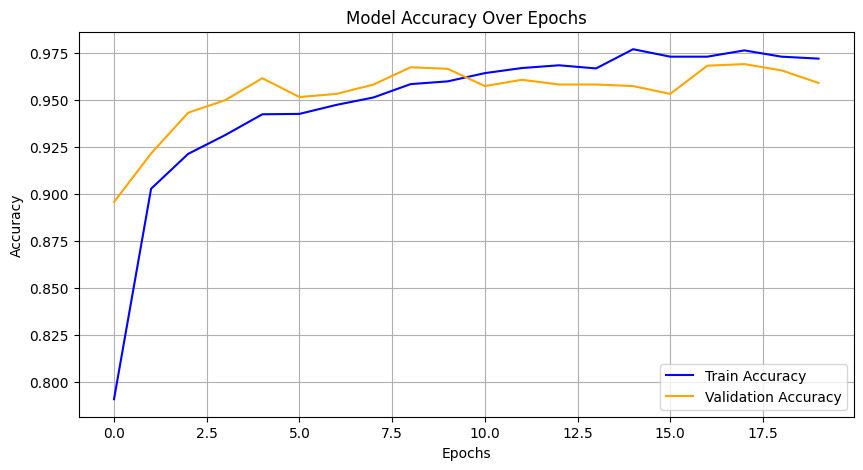

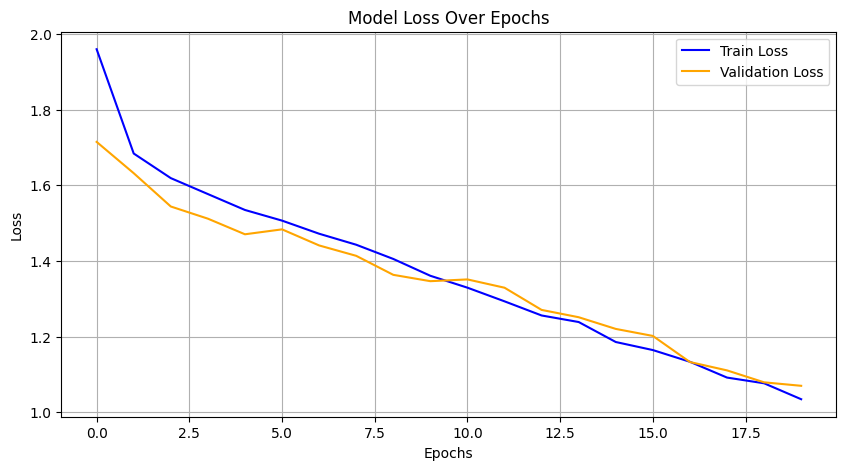

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(inception_history.history["categorical_accuracy"], label="Train Accuracy", color='blue')
plt.plot(inception_history.history["val_categorical_accuracy"], label="Validation Accuracy", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(inception_history.history["loss"], label="Train Loss", color='blue')
plt.plot(inception_history.history["val_loss"], label="Validation Loss", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss Over Epochs")
plt.grid(True)
plt.show()

**Inception Model Graph Analysis**:

**Accuracy:**:

***Train Accuracy:***
1. The accuracy steadily increases to 97.5% from 80%
2. The curve somewhat smoothly converges, showing that the model is learning 

***Validation Accuracy:***:
1. Accuracy is the max at around 97% which shows that the model is generalising well on the data
2. Graph too shows some slight fluctuations, which can be a sign of the model overfitting in the later epochs. 

The Accuracy graph shows that the model is trained well on the data as it is showcasing high generalisation.

**Loss:**

***Train Loss:***
1. The graph follows an expected decreasing trend. 

***Validation loss:***
1. The line follows very closely to the training loss, which is evident that the model is not overfitting. 

The model has achieved good results and shows signs of no major fluctuations, with the parallel trend of train and val loss evident that the model is learning very effectively without any severe overfitting. 

In [ ]:
# test acc and test loss 
test_loss_final, test_acc_final= Transfer_Inception_232594T.evaluate(inception_test_dataset)
print(f"Final Test loss: {test_loss_final:.3f}")
print(f"Final Test accuracy: {test_acc_final:.3f}")

/Users/saikeerthan/NYP-AI/Deep_Learning/Project/new_dl/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - categorical_accuracy: 0.9770 - loss: 1.0121
Final Test loss: 1.021
Final Test accuracy: 0.974


Inception v3 model has achieved an impressive 97.4% accuracy, very similar to MobileNetV3 Small's accuracy. 

However, V3 Model achieved a 96.4% accuracy with the inclusion of attention mechanism, whereas the same attention mechanism, when implemented in Inception, achieved higher test accuracy. 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


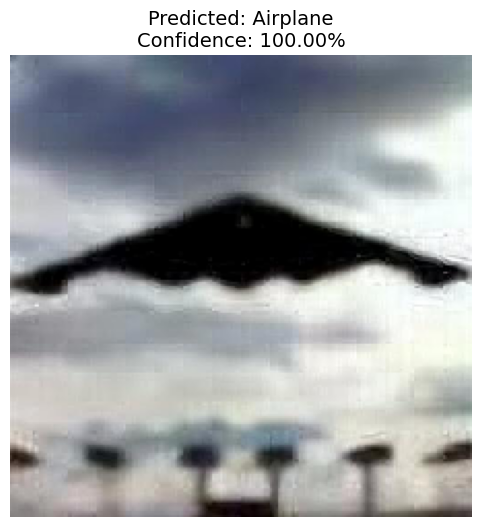

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array


class_labels = ["Airplane", "Truck", "Automobile"]  

def preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))  
    image_array = img_to_array(image) 
    image_normalized = image_array.astype(np.float32) / 255.0  
    image_expanded = np.expand_dims(image_normalized, axis=0) 

    return image, image_expanded 

def predict_image(image_path, model):

    original, preprocessed = preprocess_image(image_path) 

    preds = model.predict(preprocessed) 
    pred_class = np.argmax(preds, axis=1)[0] 
    confidence = np.max(preds) * 100 

    plt.figure(figsize=(6, 6))
    plt.imshow(original) 
    plt.axis("off")
    plt.title(f"Predicted: {class_labels[pred_class]}\nConfidence: {confidence:.2f}%", fontsize=14)
    plt.show()





image_path = "/Users/saikeerthan/NYP-AI/Deep_Learning/Project2/enhanced_images3/test/airplane/0011.jpg"

# Predict and plot
predict_image(image_path, Transfer_Inception_232594T)

### DenseNet:

DenseNet is a neural network architecture where each layer is connected to every other layer in a feed-forward fashion, where each layer receives the feature maps from all preceding layers as input, and its own feature maps are passed on as input to all subsequent layers. This architecture pattern helps to remove the vanishing-gradient problem, encouraging feature reuse, and can lead to more compact networks.

The DenseNet Architecture remains largely same to what we have seen in Inception and MobileNetV3 Small. 

In [74]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import (
    Dense, GlobalAveragePooling2D, GlobalMaxPooling2D,
    Dropout, BatchNormalization, Activation, Concatenate, Input, Multiply, Reshape
)
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def attention_mechanism(input_tensor, reduction=16):
    channels = int(input_tensor.shape[-1])
    am = GlobalAveragePooling2D()(input_tensor)
    am = Reshape((1, 1, channels))(am)
    am = Dense(channels // reduction, activation='relu', kernel_initializer='he_normal', use_bias=False)(am)
    am = Dense(channels, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(am)
    x = Multiply()([input_tensor, am])
    return x


base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model.layers[:-50]:
    layer.trainable = False
for layer in base_model.layers[-50:]:
    layer.trainable = True


features = attention_mechanism(base_model.output, reduction=16)


gap = GlobalAveragePooling2D()(features)
gmp = GlobalMaxPooling2D()(features)
combined_pool = Concatenate()([gap, gmp])
combined_pool = BatchNormalization()(combined_pool)


x = Dense(512, kernel_regularizer=l2(0.001))(combined_pool)
x = Activation('swish')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, kernel_regularizer=l2(0.001))(x)
x = Activation('swish')(x)
x = BatchNormalization()(x)
x = Dropout(0.4)(x)

x = Dense(128, kernel_regularizer=l2(0.001))(x)
x = Activation('swish')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x) 


preds = Dense(3, activation='softmax')(x)


Transfer_DenseNet_232594T = Model(inputs=base_model.inputs, outputs=preds)
Transfer_DenseNet_232594T.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

Transfer_DenseNet_232594T.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_2    │ (None, 230, 230,  │          0 │ input_layer_5[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_2… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_3    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_3… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 8,394,051 (32.02 MB)

 Trainable params: 2,426,307 (9.26 MB)

 Non-trainable params: 5,967,744 (22.77 MB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

epochs = 20
optimizer = Adam(learning_rate = 0.0001)


check_point = ModelCheckpoint(filepath='/Users/saikeerthan/NYP-AI/Deep_Learning/Project2/DenseNet_files/model_checkpointss/DenseNet-{epoch:02d}-{val_categorical_accuracy:.2f}.h5',monitor="val_categorical_accuracy", mode="max", save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    mode='auto',
    restore_best_weights=False,
    start_from_epoch=0
) # track best version of model by it's loss on the validation set. 


Transfer_DenseNet_232594T.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['categorical_accuracy'])
dense_history = Transfer_DenseNet_232594T.fit(train_dataset, validation_data=val_dataset, epochs=epochs, callbacks=[early_stopping, check_point])

Epoch 1/20


/Users/saikeerthan/NYP-AI/Deep_Learning/Project/new_dl/lib/python3.10/site-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_1428']
Received: inputs=Tensor(shape=(None, 224, 224, 3))
  warnings.warn(msg)


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 875ms/step - categorical_accuracy: 0.5074 - loss: 2.5586

150/150 ━━━━━━━━━━━━━━━━━━━━ 171s 1s/step - categorical_accuracy: 0.5077 - loss: 2.5578 - val_categorical_accuracy: 0.5758 - val_loss: 2.1938
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 916ms/step - categorical_accuracy: 0.6396 - loss: 2.1589

150/150 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - categorical_accuracy: 0.6396 - loss: 2.1587 - val_categorical_accuracy: 0.6858 - val_loss: 1.9446
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 949ms/step - categorical_accuracy: 0.6957 - loss: 1.9838

150/150 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - categorical_accuracy: 0.6957 - loss: 1.9837 - val_categorical_accuracy: 0.7483 - val_loss: 1.7910
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 948ms/step - categorical_accuracy: 0.7331 - loss: 1.8426

150/150 ━━━━━━━━━━━━━━━━━━━━ 175s 1s/step - categorical_accuracy: 0.7331 - loss: 1.8424 - val_categorical_accuracy: 0.8017 - val_loss: 1.6716
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - categorical_accuracy: 0.7816 - loss: 1.6886 - val_categorical_accuracy: 0.7992 - val_loss: 1.6429
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 965ms/step - categorical_accuracy: 0.8192 - loss: 1.5975

150/150 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - categorical_accuracy: 0.8193 - loss: 1.5974 - val_categorical_accuracy: 0.8150 - val_loss: 1.5835
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.8480 - loss: 1.4758

150/150 ━━━━━━━━━━━━━━━━━━━━ 190s 1s/step - categorical_accuracy: 0.8480 - loss: 1.4758 - val_categorical_accuracy: 0.8350 - val_loss: 1.5207
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.8851 - loss: 1.3817

150/150 ━━━━━━━━━━━━━━━━━━━━ 425s 3s/step - categorical_accuracy: 0.8851 - loss: 1.3818 - val_categorical_accuracy: 0.8467 - val_loss: 1.4681
Epoch 9/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - categorical_accuracy: 0.8954 - loss: 1.3175

150/150 ━━━━━━━━━━━━━━━━━━━━ 490s 3s/step - categorical_accuracy: 0.8954 - loss: 1.3175 - val_categorical_accuracy: 0.8475 - val_loss: 1.4562
Epoch 10/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 455s 3s/step - categorical_accuracy: 0.9168 - loss: 1.2663 - val_categorical_accuracy: 0.8433 - val_loss: 1.4485
Epoch 11/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 403s 3s/step - categorical_accuracy: 0.9394 - loss: 1.1880 - val_categorical_accuracy: 0.8133 - val_loss: 1.5601
Epoch 12/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.9437 - loss: 1.1655

150/150 ━━━━━━━━━━━━━━━━━━━━ 401s 3s/step - categorical_accuracy: 0.9437 - loss: 1.1653 - val_categorical_accuracy: 0.8533 - val_loss: 1.4677
Epoch 13/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - categorical_accuracy: 0.9669 - loss: 1.0932 - val_categorical_accuracy: 0.8317 - val_loss: 1.4700
Epoch 14/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - categorical_accuracy: 0.9646 - loss: 1.0810 - val_categorical_accuracy: 0.8283 - val_loss: 1.4719
Epoch 15/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 306s 2s/step - categorical_accuracy: 0.9711 - loss: 1.0530 - val_categorical_accuracy: 0.8467 - val_loss: 1.4408
Epoch 16/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.9690 - loss: 1.0386

150/150 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - categorical_accuracy: 0.9689 - loss: 1.0386 - val_categorical_accuracy: 0.8542 - val_loss: 1.3994
Epoch 17/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - categorical_accuracy: 0.9716 - loss: 1.0121

150/150 ━━━━━━━━━━━━━━━━━━━━ 275s 2s/step - categorical_accuracy: 0.9716 - loss: 1.0121 - val_categorical_accuracy: 0.8650 - val_loss: 1.3554
Epoch 18/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - categorical_accuracy: 0.9840 - loss: 0.9683 - val_categorical_accuracy: 0.8475 - val_loss: 1.4017
Epoch 19/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.9810 - loss: 0.9542

150/150 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - categorical_accuracy: 0.9810 - loss: 0.9541 - val_categorical_accuracy: 0.8658 - val_loss: 1.3729
Epoch 20/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - categorical_accuracy: 0.9808 - loss: 0.9419

150/150 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - categorical_accuracy: 0.9807 - loss: 0.9419 - val_categorical_accuracy: 0.8683 - val_loss: 1.2831


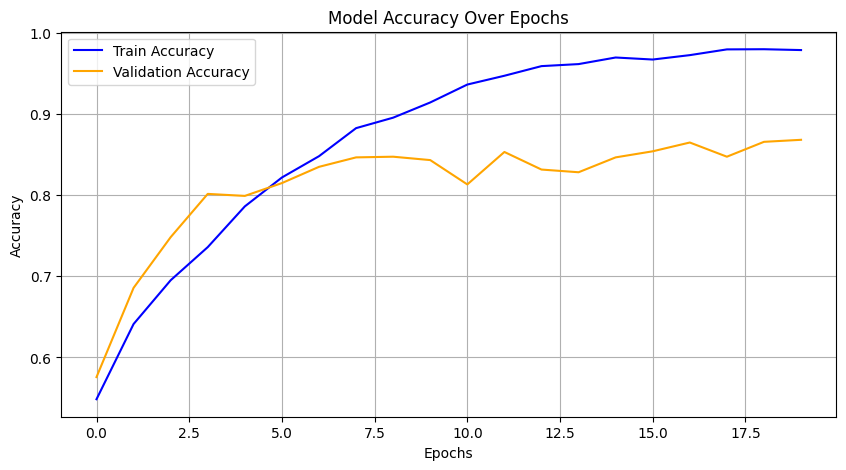

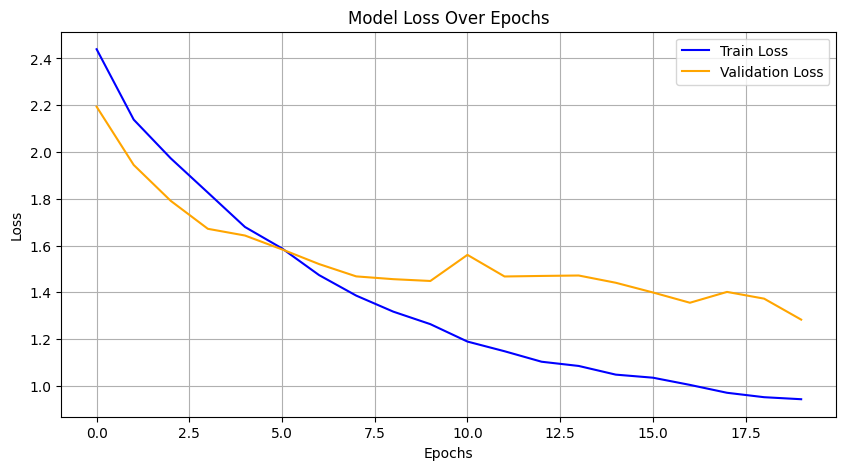

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(dense_history.history["categorical_accuracy"], label="Train Accuracy", color='blue')
plt.plot(dense_history.history["val_categorical_accuracy"], label="Validation Accuracy", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy Over Epochs")
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(dense_history.history["loss"], label="Train Loss", color='blue')
plt.plot(dense_history.history["val_loss"], label="Validation Loss", color='orange')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss Over Epochs")
plt.grid(True)
plt.show()

**Accuracy:**

***Training:***

1. The training accuracy goes as much a 98%, with a constant upward trend, hinting that the model is learning well from the training set. 

***Validation:***

1. The Validation set however, shows that there are fluctuations later on, which indicates that the model might be overfitting.
2. It fails to follow the training accuracy closely, which might also be another hint that the model is memorising the training data, but it struggles with generalising the data. 

From the Accuracy Graph, we can see that DenseNet model struggles to generalise well. 

**Loss:**

***Training:***

1. No significant spikes present, which shows that stable learning by the model. 

***Validation:***

1. Follows closely with the training loss, but it then deviates and fluctuates in later epochs, which is aligning with the behaviour of the val accuracy line, confirming overfitting by the model. 

The Loss graphs shows us that the model is not learning anything useful after the 8-10th epoch, and that DenseNet model is not really able to generalise well on the dataset. 

In [ ]:
# test acc and test loss 
test_loss_final, test_acc_final= Transfer_DenseNet_232594T.evaluate(test_dataset)
print(f"Final Test loss: {test_loss_final:.3f}")
print(f"Final Test accuracy: {test_acc_final:.3f}")

47/47 ━━━━━━━━━━━━━━━━━━━━ 38s 794ms/step - categorical_accuracy: 0.8531 - loss: 1.3256
Final Test loss: 1.310
Final Test accuracy: 0.861


The DenseNet model achieved a test accuracy of 86%, while it is still relatively high, it falters when compared to other Transfer Learning Models like MobileNetV3 Small & Inception. 

This might be due to the overfitting that the DenseNet model is suffering from as it is represeting closely to what the validation set achieved. 

# Comparison of the Different Transfer Learning Models: 

1. **MobileNetV3 Small:**
   - ***Final Training Accuracy:*** 99.8%
   - ***Final Validation Accuracy:*** 97%
   - ***Final Test Accuracy:***: 97%
   - ***Final Test Loss:***: 0.338


2. **Inception:**
   - ***Final Training Accuracy:*** 97%
   - ***Final Validation Accuracy:*** 96%
   - ***Final Test Accuracy:***: 97.4%
   - ***Final Test Loss:***: 1.021


3. **DenseNet:**
   - ***Final Training Accuracy:*** 98%
   - ***Final Validation Accuracy:*** 96%
   - ***Final Test Accuracy:***: 86.1%
   - ***Final Test Loss:***: 1.310

From the above comparison, we can see that:

- V3Small achieved the second highest test accuracy, with the lowest test loss
- Inception achieved the highest test accuracy, but the test loss is still much higher compared to V3 Small
- DenseNet is struggling with overfitting, despite the training accuracy being 98%, it significantly dropped to 86.1%.

## **Accuracy Trends for Training and Validation**:

***Training***:
  - MobileNetV3 Small: Smooth, and early convergence at 99.8%
  - InceptionV3: Gradual Increase, stabilise at around 98%.
  - DenseNet121: Steady increase with around 98% as final training accuracy.

***Validation:***
  - MobileNetV3 Small: Slight fluctuations, but follows training accuracy closely. 
  - Very closely follows the training accuracty. 
  - Fluctuates very early(10th Epoch)

- MobileNetV3 Small shows strong generalisation betweeen the training and the validation accuracy. 
- InceptionV3 shows the strongest acuracy trends, but it took longer to train, around 88s per epoch. 
- DenseNet121 shows the weakest trends, as it struggles with the validation accuracy and showcased poor generalisation. 

## **Loss trends for Training and Validation:**

***Training***: 
  - MobileNetV3 Small showcased a smooth decrease
  - InceptionV3 showcased a smooth decrease too. 
  - DenseNet121 showcased a steady decrease.

***Validation***:
  - MobileNetV3 Small's loss follows very closely when compared against the train loss. 
  - InceptionV3's loss follows the training loss closely too but suffers from a bit of fluctuations. 
  - DenseNet121 does not decrease as much 

- MobileNetV3 Small showcased consistent low loss and minimal overfitting. 
- InceptionV3 showcased a higher loss than MobileNetV3, although it acheives impressive loss numbers with slight instability. This can be a sign that the model is unsure of it's predictions. 
- DenseNet121 suffers from severe generalisation issues, with the validation loss staying the highest, confirming overfitting. 

## **Test:**

- MobileNetV3 Small metrics are very well balanced and stable. 
- InceptionV3 delivers slightly better test accuracy, but has a higher loss. 
- DenseNet121 struggles significantly with generalisation with the worst test accuracy. 

# Verdict: 

Looking at all the information on top, I have come to the conclusion that **MobileNetV3 Small** is the best Transfer Learning Model and these are the reasons: 

1. MobileNetV3 Small has the fastest training and inference, with the best balance of accuracy and loss. 
2. Minimal Overfitting
3. Achieved the best results without the need for attention mechanisms, which was applied to DenseNet121 and InceptionV3. 
4. It is the best overall model for efficiency(4s per epoch), accuracy and generalisation. 

Why Not InceptionV3 | DenseNet121? 

**InceptionV3**:

1. Achieved the highest test accuracy, with good generalisation, but also delivered a high loss as compared to MobileNetV3 Small, and the accuracy is very similar between both MobileNEtv3 small and InceptionV3. 
2. Computationally expensive (88s per epoch)

**DenseNet121**:

1. Good training accuracy, but falters when it comes to the final validation accuracy and test accuracy. 
2. Shows signs of overfitting and poor generalisation. 
3. This shows it suffers to generalise well on blurry images and the complexity of the dataset. 

Therefore, **MobileNetV3** Small is the best Transfer learning Model out of the three tested. 

# Comparison of CNN Model trained and MobileNetV3 Small:

## Training Accuracy: 

1. CNN - 98%
2. MobileNetV3 Small - 99.8%

## Validation Accuracy: 
1. CNN - 92%
2. MobileNetV3 Small - 97%

## Test Accuracy: 
1. CNN - 92.1%
2. MobileNetV3 Small - 97%

## Training Time Per Epoch: 
1. CNN - Around 400s per epoch
2. 20s per epoch

- MobileNetV3 small outperforms the CNN Model in terms of the Training, Validation and Test Accuracy. 
- however, CNN has a lower test loss as compared to MobileNetV3 Small, which may indicate the CNN model is a bit more confident in predictions. 
- MobileNetV3 small however, generalises much better than CNN, as there is a smaller difference in the accuracy from Training and Validation. 

## Accuracy Trends: 

**Training**: 
1. CNN - Sharp increases, and stabilises near 98%. 
2. MobileNetV3 Small - Follows similar pattern, stabilising near 99.8%

**Validation**: 
1. CNN - Maxes out at 92%, and then begins to fluctuate
2. MobileNetV3 Small - Closely follows the training accuracy. 

- This shows that CNN is prone to overfitting since the validation line fluctuates after it reaches the max accuracy, which is 92%. 
- MobileNetV3 Small is however not prone to overfitting as it follows the training accuracy closely. 
- CNN also suffers from a larger accuracy gap as mentioned before. 
- Consistent high validation accuracy from MobileNetV3 Small. 

## Loss Trends: 

**Training**: 
1. CNN - Smooth decrease
2. MobileNetV3 Small = Smooth decrease too.

**Validation**:
1. CNN - Starts to fluctuate 
2. MobileNetV3 Small: closely follows training loss. 

- CNN is prone to some instability in the valisation loss, which might translate to it not generalising well. 
- MobileNetV3 Small shows very stable learning, with little instability, maintaining a more stable loss trend.
- CNN also has a lower test loss, but a lower accuracy, which means it is more confident but less correct. 

## Test Performance:

**Test Accuracy**:
1. CNN - 92.1% 
2. MobileNetV3 Small: 97.0%

**Test Loss**: 
1. CNN - 0.241
2. MobileNetV3 Small: 0.338

- MobileNetV3 Small is able to achieve significantly higher test accuracy as compared to CNN. 
- As discussed earlier, CNN is more confident in it's answers but is less correct. 
- MobileNetV3 Small generalises well across unseen data. 

## Confusion Matrix Analysis: 
1. CNN - around 6% error rate. 
2. MobileNetV3 Small - 3% error rate. 

- MobileNetV3 Small and CNN both suffer in misclassifying pictures from the truck class, but MobileNetV3 small is proven to be more consistent in classifying across all classes, even the more complex classes, showing a more balanced classification performance. 

# Final Verdict For The Project: 

After considering the performance of all the transfer learning models, and then comparing MobileNetV3 small to CNN, **MobileNetV3 Small** is a better Deep Learning model to classify blurry images of different classes. 

**MobileNetV3 Small**: 
- Achieves higher test accuracy than CNN with minimal overfitting and showing signs of stable learning. 
- It however has a slightly higher test loss, but it is compensated for the test accuracy. 

**MobileNetV3 Small** is the best Deep Learning Model, which proves that Transfer Learning Models perform better than CNN models. 